# Supervised Learning on Bank personal loan lending.

Import all necesary Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
sl_data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [85]:
sl_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Data loaded into data frame.

In [86]:
#check the dimensions of Loan lend data
sl_data.shape

(5000, 14)

There are 5000 observation and about 14 attributes captured

# Understanding the data

1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer 
5. ZIP Code : Home Address ZIP code.
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month (000)
8. Education : Education Level.
9. Undergrad
10. Graduate
11. Advanced/Professional
12. Mortgage : Value of house mortgage if any. (000)
13. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
14. Securities Account : Does the customer have a securities account with the bank?
15. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
16. Online : Does the customer use internet banking facilities?
17. Credit card : Does the customer use a credit card issued by Thera Bank?

In [87]:
#Check for nulls
sl_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Observation is that provided data doesnt have any irregularities i.e., no blank values.

In [88]:
sl_data.info() #check the data type of each column in the given data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


above output gives info that provided data says all attributes are either integer or float, we dont have any object columns

In [89]:
sl_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


based on above output, we have 2 findings
1. Experince attribute has -negative values which is not correct.
2. The max of Income, Experience, CCAvg, Mortgage, Security Account, CD Accounts, CreditCard is much high then their mean. 
so it looks like there is skewness in data.

In [90]:
sl_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Based on above observation, we see there are categorical attributes like Family, Education, Securities account, CD Account,
Online, Credit card and Personal loan.

In [91]:
sl_categ_col= [col for col in sl_data.columns if sl_data[col].nunique()<=5]
sl_noncateg_col= [col for col in sl_data.columns if sl_data[col].nunique()>5]
sl_categ_col,sl_noncateg_col

(['Family',
  'Education',
  'Personal Loan',
  'Securities Account',
  'CD Account',
  'Online',
  'CreditCard'],
 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage'])

Id column we can remove as it is index and nothing to do with prediction.
Personal loan will remove as this is the one we need to predict (dependent variable).

In [92]:
sl_categ_col.remove("Personal Loan")
sl_noncateg_col.remove("ID")
sl_categ_col,sl_noncateg_col

(['Family',
  'Education',
  'Securities Account',
  'CD Account',
  'Online',
  'CreditCard'],
 ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage'])

# Data Visualisation

Plotting distribution

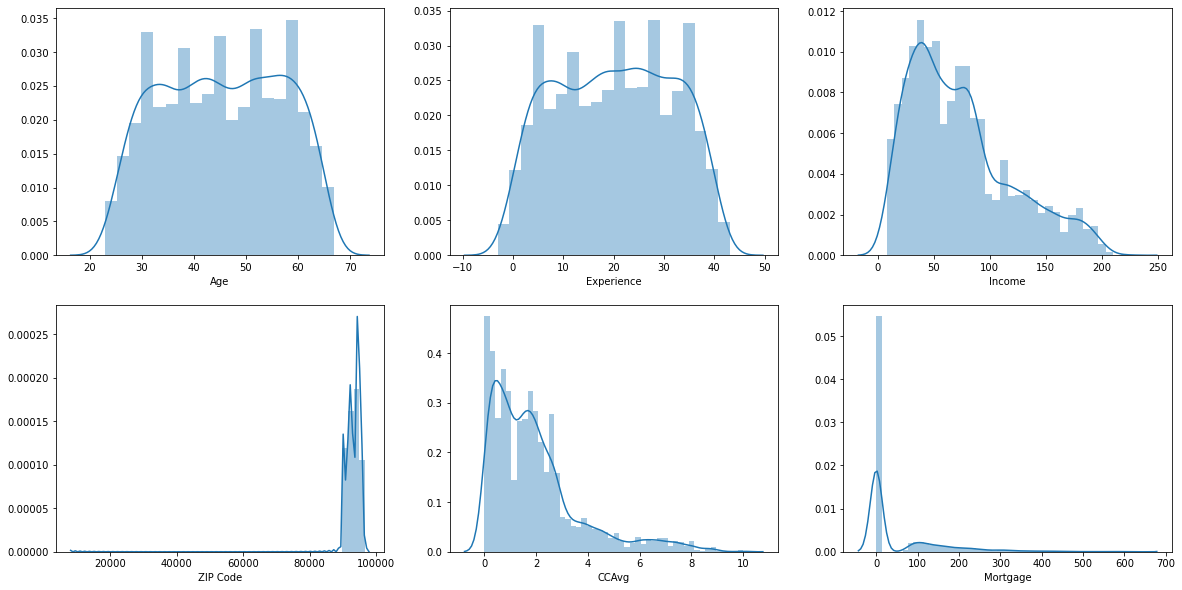

In [93]:
figur=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_noncateg_col):
    ax=figur.add_subplot(2,3,i+1)
    sns.distplot(sl_data[col])

1. we can observe Age and Experience are uniformaly distributed.
2. Income,Mortagage and CCAvg are positively skewed.
3. Zipcode is negatively skewed
4. Mortagage is almost zero for most of the given sample data.

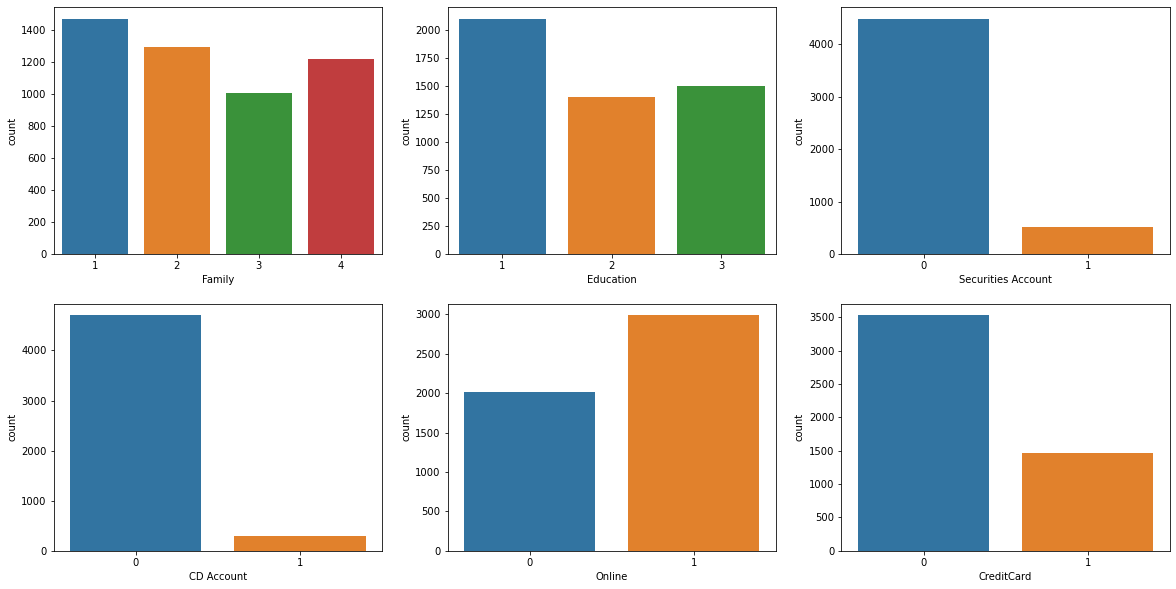

In [94]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_categ_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(sl_data[col])

1. most of the customers doesnt have securities account, Credit card and CD Account.
2. Most of the customers uses onlinle banking.
3. more customers are under graduate and with family size one.

# Bivariate Analysis

Analysing each column (Independent Attribute) first in regard with Personal Loan (Dependent attribute) and then relating them with one another for finding patterns in data


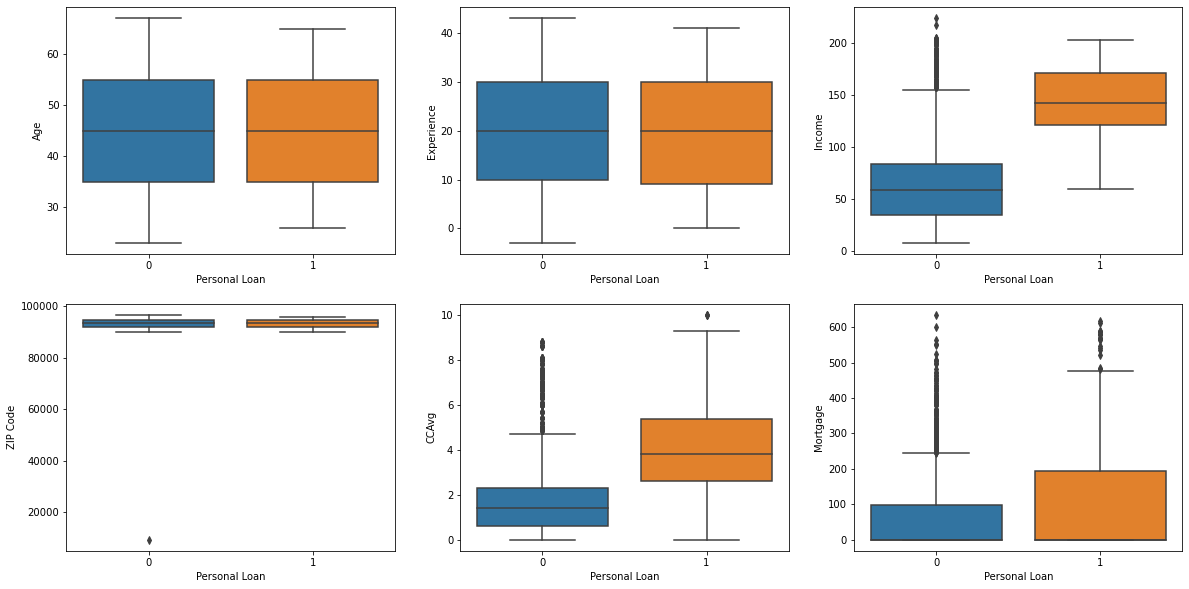

In [95]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_noncateg_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=sl_data[col],x=sl_data['Personal Loan'])

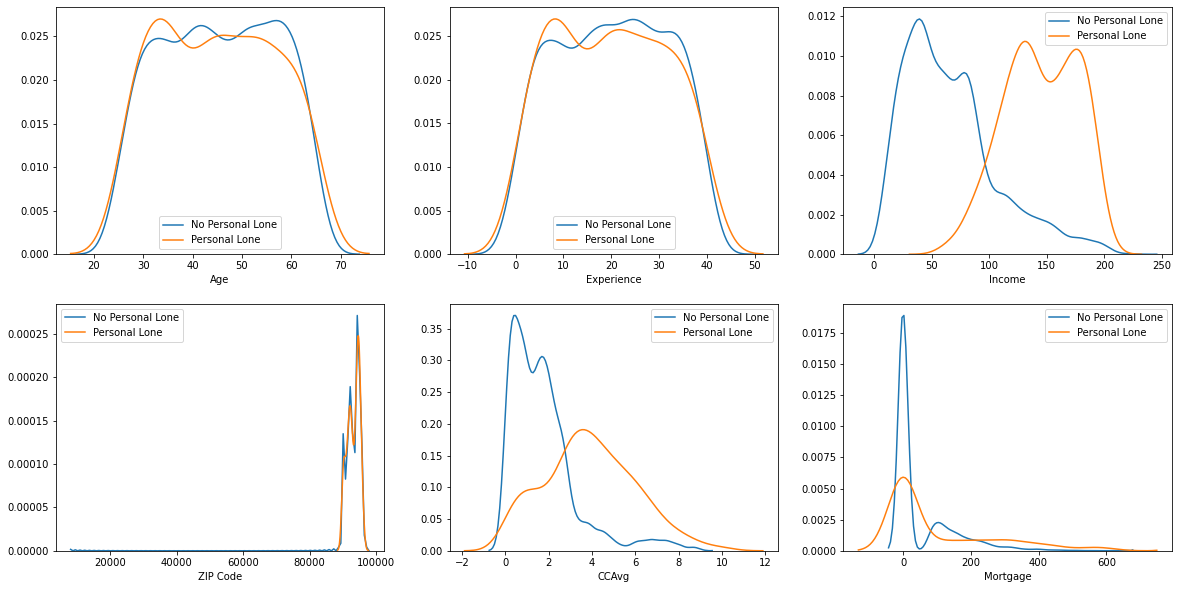

In [96]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_noncateg_col):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(sl_data[col][sl_data['Personal Loan']==0],hist=False,label='No Personal Lone')
    sns.distplot(sl_data[col][sl_data['Personal Loan']==1],hist=False,ax=ax1,label='Personal Lone')

1. Age and Experience doesnt show any variance on personal load.
2. Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.
3. CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month
4. Customers want to have high Mortgage have opted for Personal Loan.

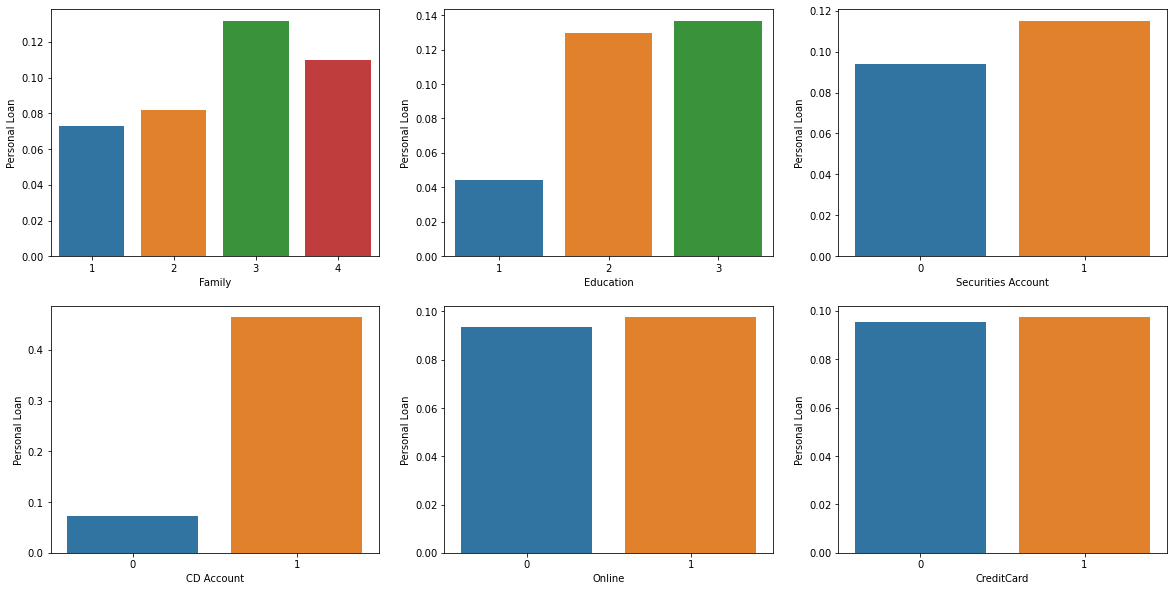

In [97]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_categ_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=sl_data,ci=None)

1. Customers with family size equal to 3 have more chances of having Personal Loan.
2. Customers with Undergraduate degree have less chances of having Personal Loan as compared to other customers having Graduate or Advanced/Professional degree
3. Customers with CD Account and Securities Account have more chances of having Personal Loan.
4. Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan

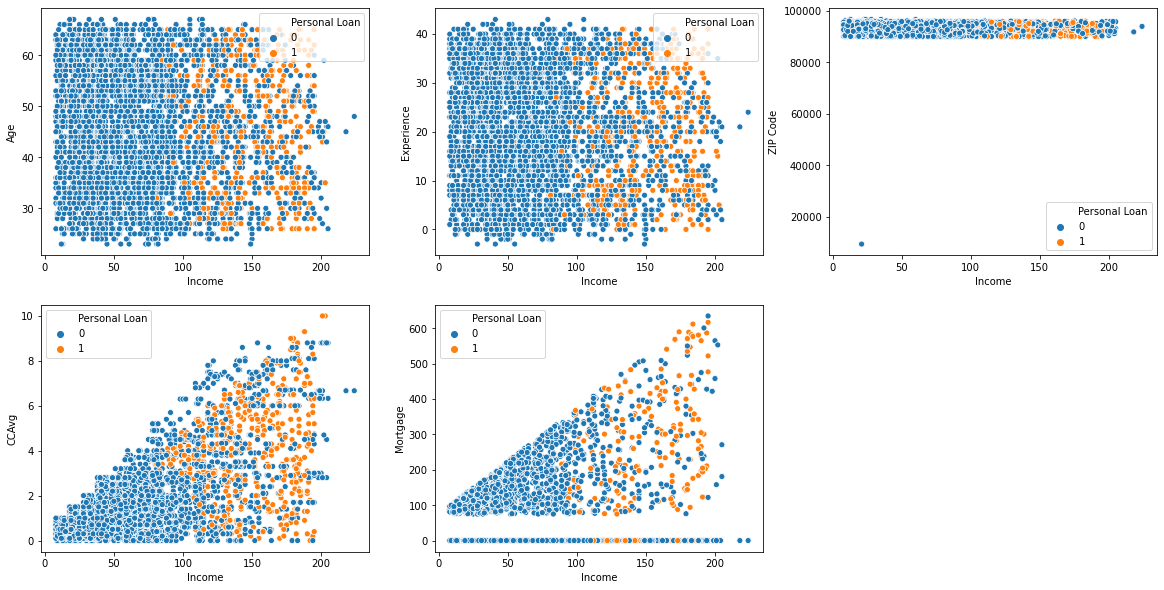

In [98]:
sl_cont=sl_noncateg_col.copy()
sl_cont.remove('Income')

fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_cont):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal Loan',data=sl_data)

1. Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
2. ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.
3. Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage

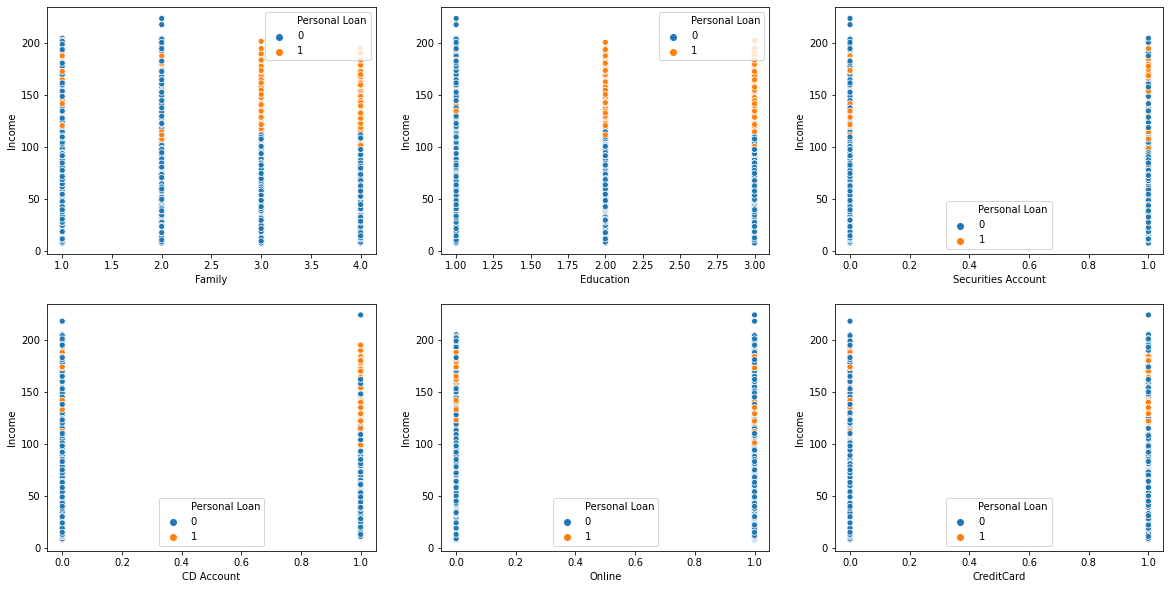

In [99]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_categ_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'Income',hue='Personal Loan',data=sl_data)

1. Customers with high Degrees and having family size greater then 3 with high income have personal loan.
2. Customers with CD Accounts have chances of having Personal Loan

After income we will find relation of CCAvg with other attributes

In [22]:
sl_cont.remove('CCAvg')

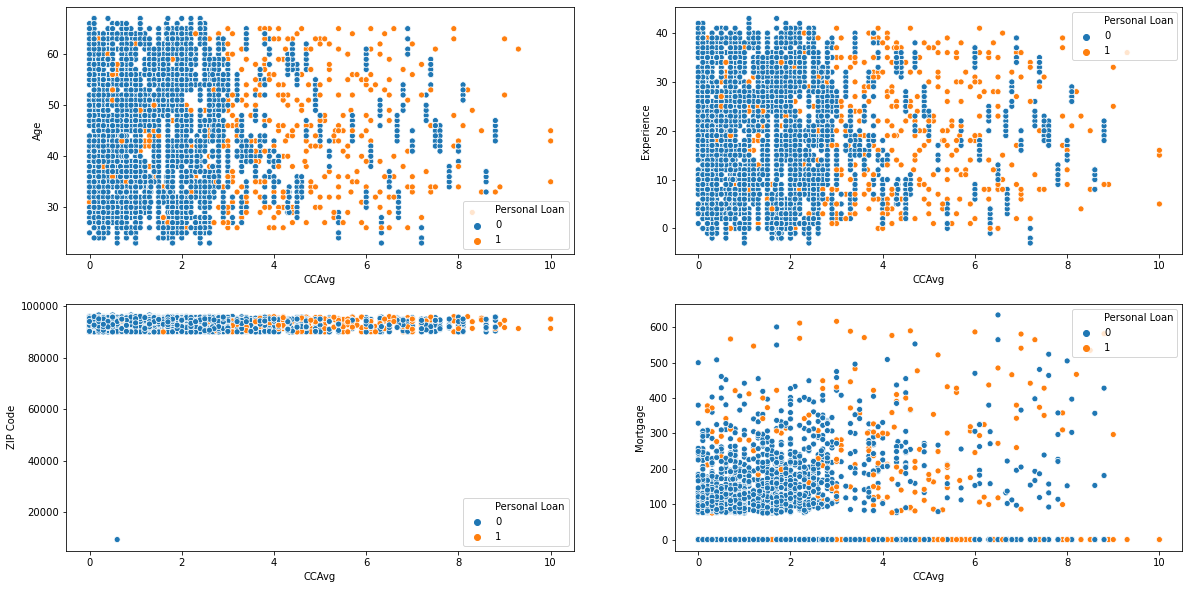

In [23]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_cont):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal Loan',data=sl_data)

1. Age and Experience show same patterns on customers with personal loan or not.
2. high CCAvg and Mortgage have more chances of customer having Personal Loan.

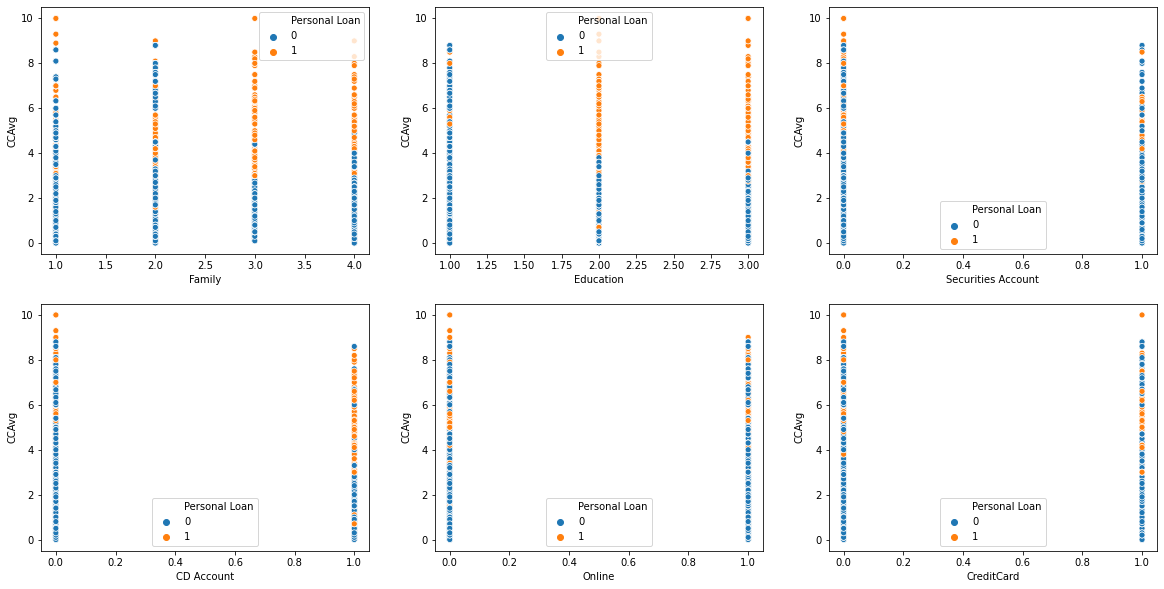

In [100]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_categ_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'CCAvg',hue='Personal Loan',data=sl_data)

CCAvg Shows similar trends as shown by Income

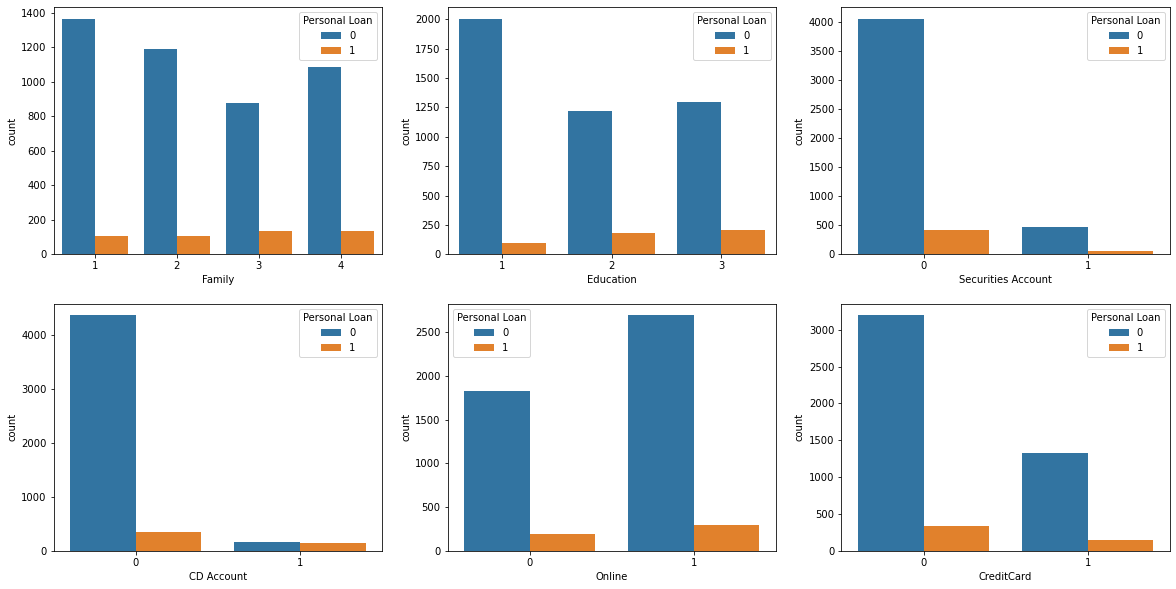

In [101]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(sl_categ_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal Loan',data=sl_data)

these graph clearly depicts the facts that we had observed previously above like person with CD Account have more chances of having Personal Loan

# Data cleaning

In [102]:
sl_data.drop_duplicates(inplace=True)

In [103]:
sl_data.shape

(5000, 14)

Since there are no duplicate enteries or row in data.

In [104]:
sl_data.set_index("ID",inplace=True)

ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data.
Zip code contain data of particular area so it contain minimum variations so we will remove it.

In [105]:
sl_data.drop('ZIP Code',axis=1,inplace=True)

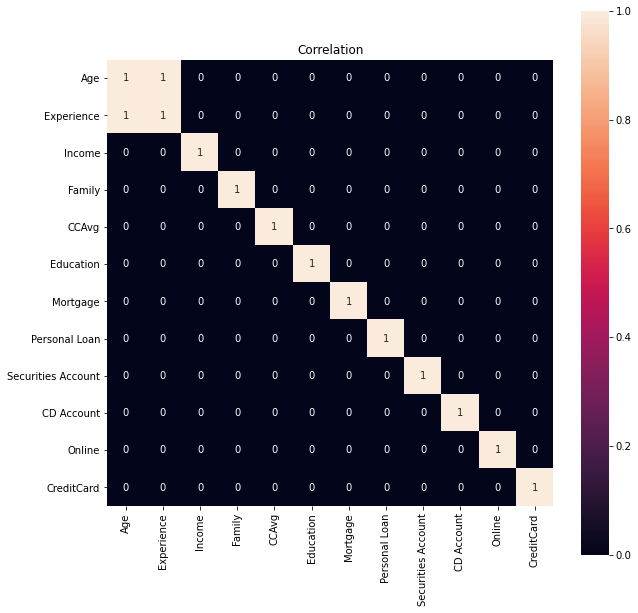

In [106]:
# correlation between Age and Experience
corr=sl_data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True)

In [107]:
sl_data[['Age','Experience','Personal Loan']].corr()

,Age,Experience,Personal Loan
Age,1.000000,0.994215,-0.007726
Experience,0.994215,1.000000,-0.007413
Personal Loan,-0.007726,-0.007413,1.000000


since Age shows a little better correlation with Personal loan we will drop the Experience attribute

In [108]:
sl_data.drop('Experience',axis=1,inplace=True)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [110]:
scaled_sl_data=scaler.fit_transform(sl_data.drop('Personal Loan',axis=1))

In [111]:
scaled_sl_data=pd.DataFrame(scaled_sl_data)

In [112]:
scaled_sl_data.columns=sl_data.drop('Personal Loan',axis=1).columns
scaled_sl_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


C:\Users\subbare\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\subbare\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\subbare\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


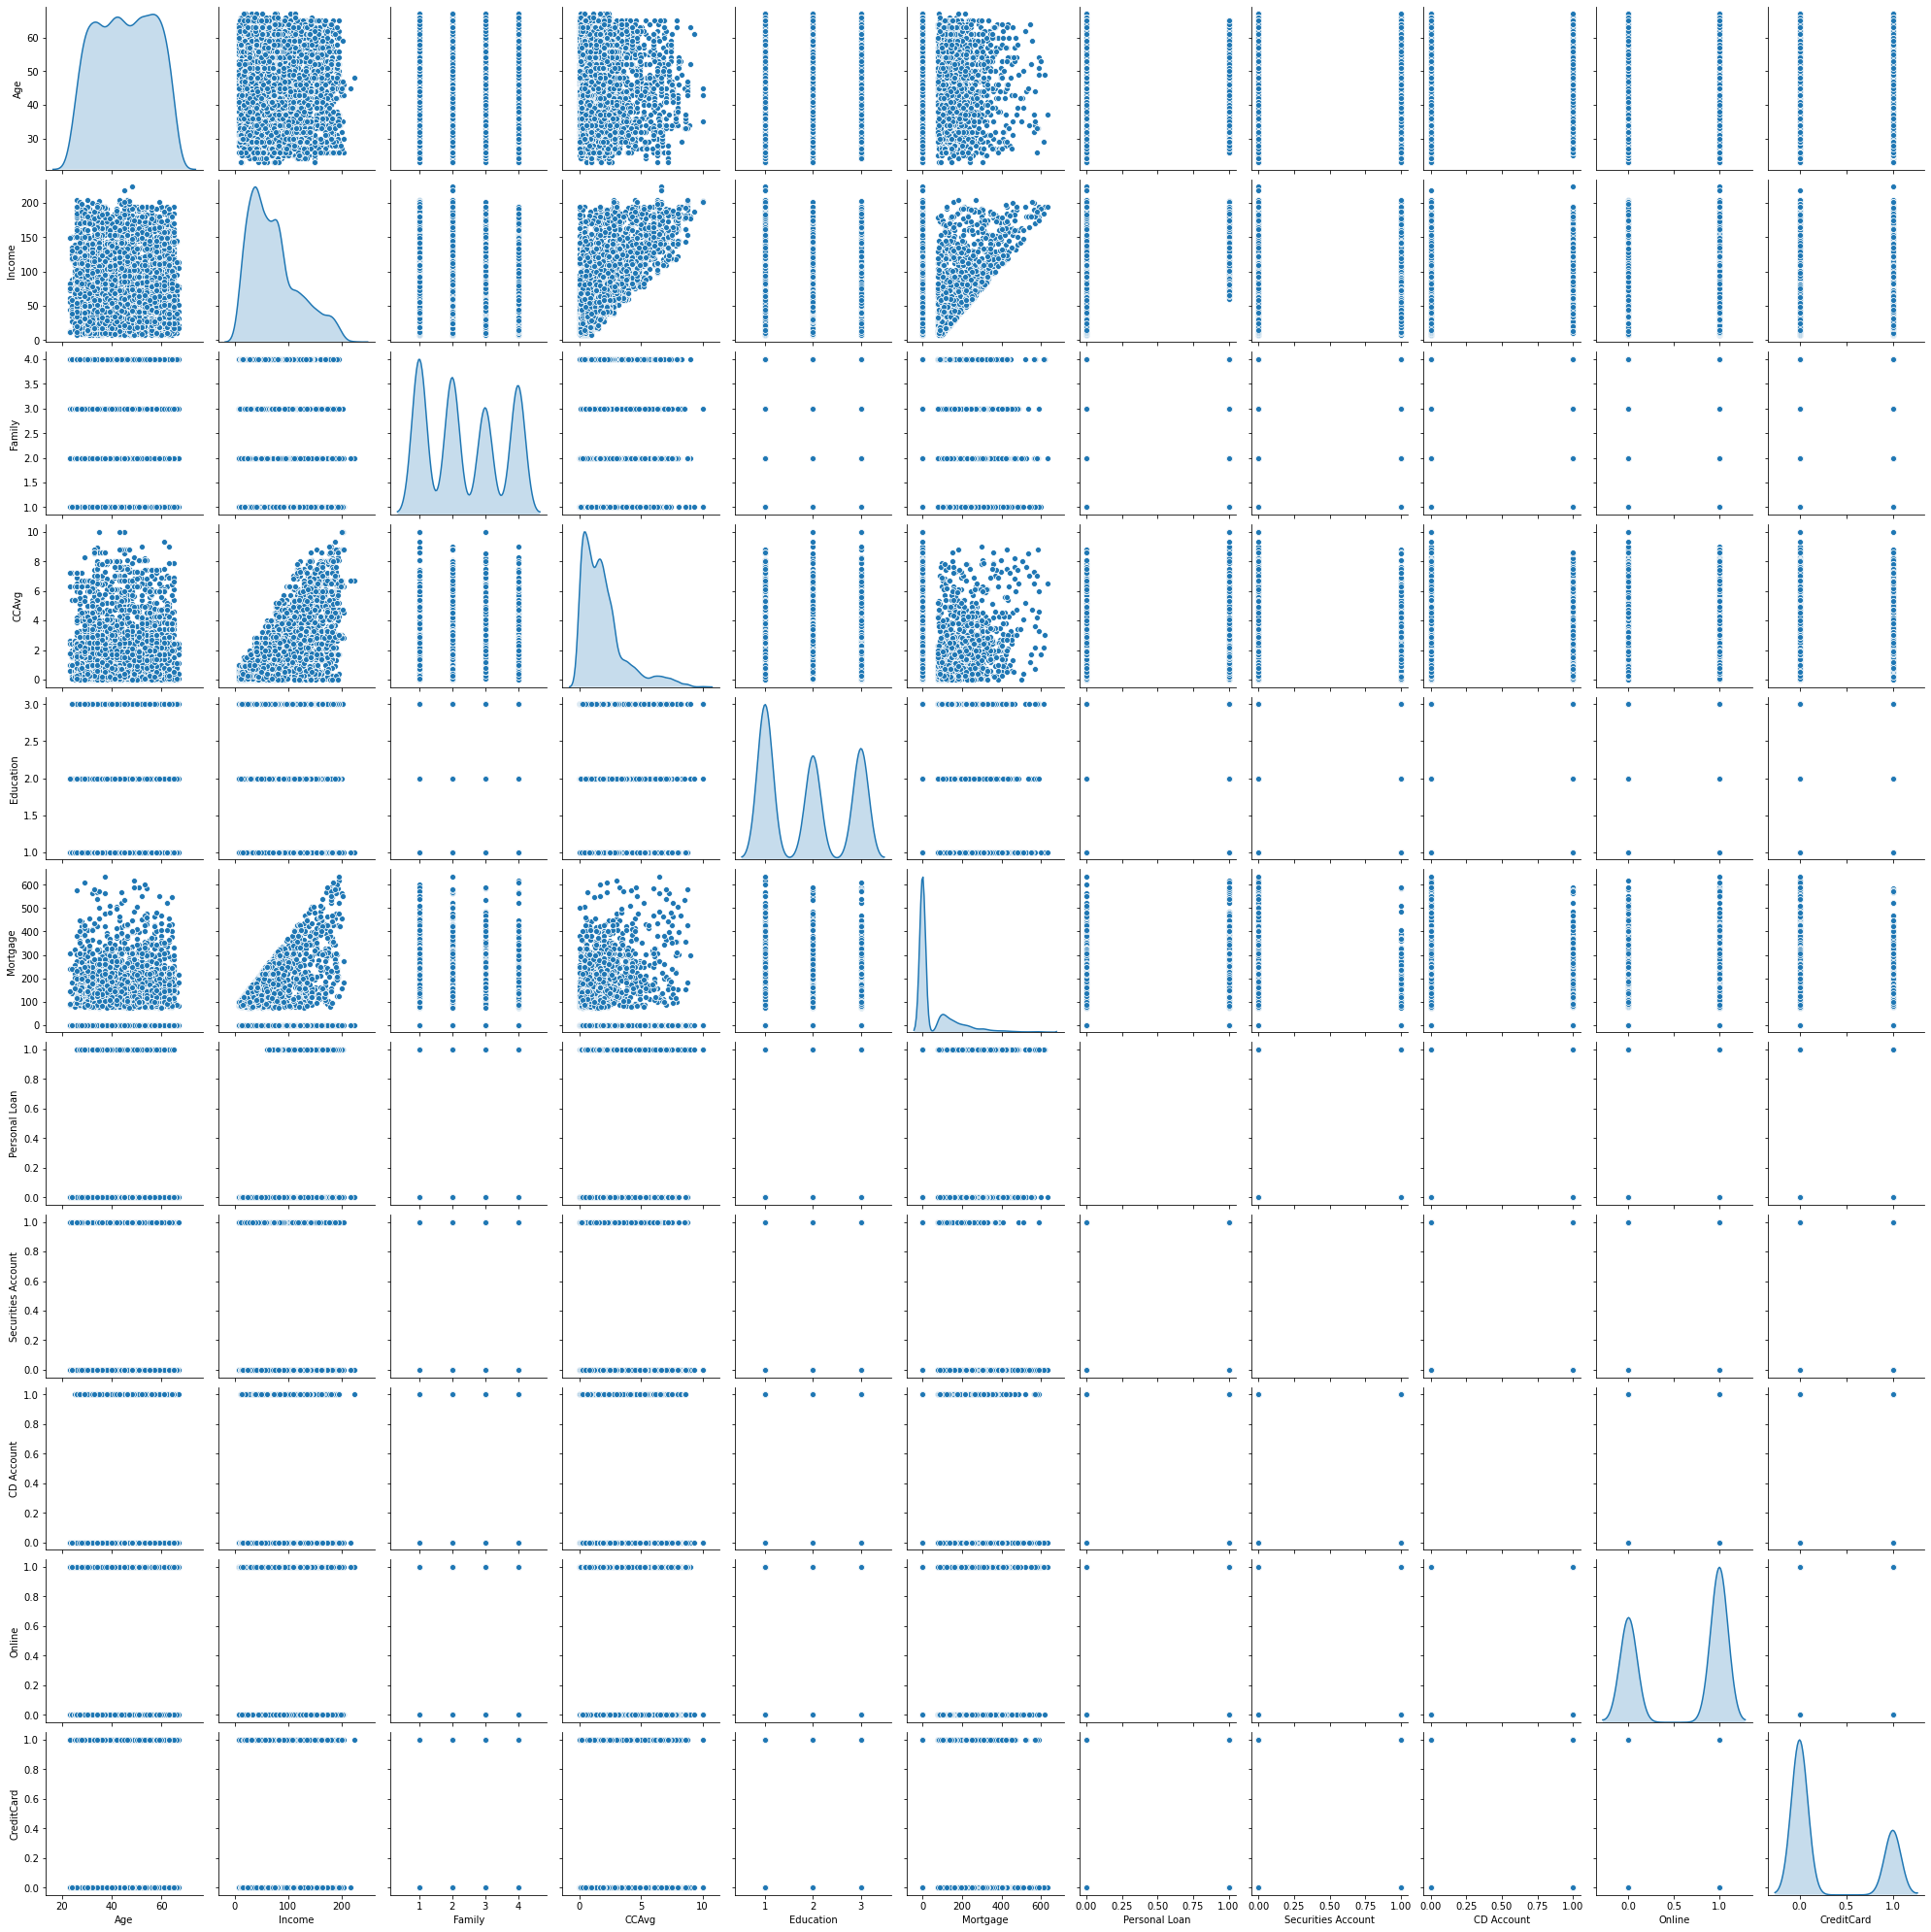

In [145]:
sns.pairplot(sl_data,diag_kind='kde')

# Model Development

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [115]:
X=scaled_sl_data
y=sl_data['Personal Loan']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [117]:
model_list=[]
model_accuracy=[]
model_f1score=[]

# Logistic Regression

In [118]:
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [119]:
lm.fit(x_train,y_train)

LogisticRegression()

In [120]:
yhat_lm=lm.predict(x_test)

In [129]:
lm_score=f1_score(y_test,yhat_lm)
model_f1score.append(lm_score)
lm_score

0.6742424242424242

In [130]:
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy.append(lm_accuracy)
lm_accuracy

0.9426666666666667

In [131]:
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.84      0.56      0.67       158

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [132]:
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat_lm)))
print()

Model Accuracy: 0.9427



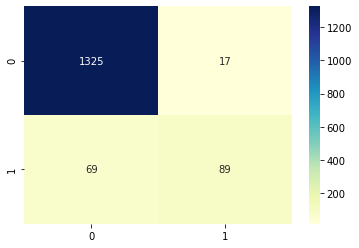

In [133]:
sns.heatmap(confusion_matrix(y_test,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

# KNN Neighbours

In [134]:
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()

In [135]:
neighbour.fit(x_train,y_train)

KNeighborsClassifier()

In [136]:
yhat_neighbour=neighbour.predict(x_test)

In [137]:
neighbour_score=f1_score(y_test,yhat_neighbour)
model_f1score.append(neighbour_score)
neighbour_score

0.7424242424242424

In [138]:
neighbour_accuracy=accuracy_score(y_test,yhat_neighbour)
model_accuracy.append(neighbour_accuracy)
neighbour_accuracy

0.9546666666666667

In [139]:
print(classification_report(y_test,yhat_neighbour))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1342
           1       0.92      0.62      0.74       158

    accuracy                           0.95      1500
   macro avg       0.94      0.81      0.86      1500
weighted avg       0.95      0.95      0.95      1500



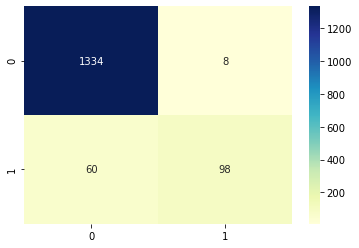

In [59]:
sns.heatmap(confusion_matrix(y_test,yhat_neighbour),annot=True,fmt='',cmap='YlGnBu')

In [125]:
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat_neighbour)))
print()

Model Accuracy: 0.9547



# Navie Bayes 

In [62]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
model_list.append('NavieBayesClassifier')
naviebayes= GaussianNB()

In [63]:
naviebayes.fit(x_train,y_train)

GaussianNB()

In [142]:
yhat_navb=naviebayes.predict(x_test)

In [141]:
nb_score=f1_score(y_test,yhat_navb)
model_f1score.append(nb_score)
nb_score

0.5245901639344263

Lets check the confusion matrix and classification report

In [126]:
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, yhat_navb)))
print()

Model Accuracy: 0.8840



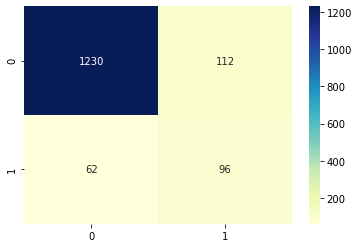

In [149]:
sns.heatmap(confusion_matrix(y_test,yhat_navb),annot=True,fmt='',cmap='YlGnBu')

In [79]:
print("Classification Report")
print(metrics.classification_report(y_test, yhat_navb, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.46      0.61      0.52       158
           0       0.95      0.92      0.93      1342

    accuracy                           0.88      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.88      0.89      1500



Conclusion
Among 3 models, KNN has good accurecy and f1 score. it ha accurecy of 98% and f1 score of 95%.

Coparision of Models

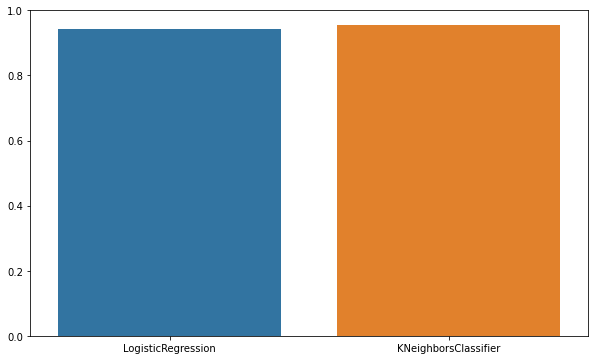

In [155]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(model_list,model_accuracy)

KeyError: 'LogisticRegression'

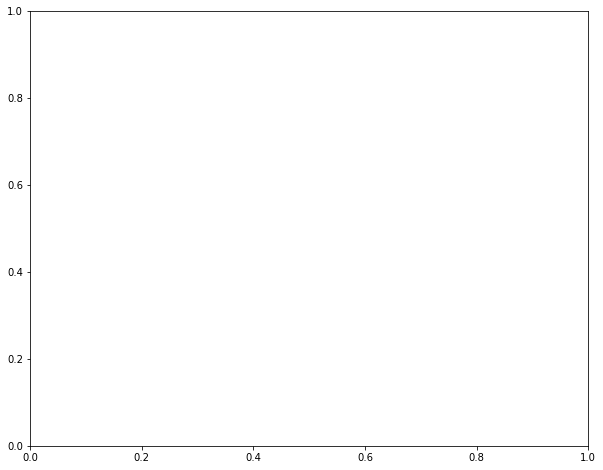

In [157]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1score)